Skipping non-image file: desktop.ini
Skipping non-image file: desktop.ini
Skipping non-image file: desktop.ini
Found 3 valid classes with images:
  angular_leaf_spot: 330 images
  bean_rust: 330 images
  healthy: 330 images
Loaded 990 images with shape (128, 128, 3).


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.3500 - loss: 1.2352 - val_accuracy: 0.5597 - val_loss: 1.0259
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.4685 - loss: 1.0153 - val_accuracy: 0.7044 - val_loss: 0.7653
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.6203 - loss: 0.8280 - val_accuracy: 0.6855 - val_loss: 0.7401
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.6464 - loss: 0.7785 - val_accuracy: 0.6918 - val_loss: 0.6916
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.7248 - loss: 0.6545 - val_accuracy: 0.7673 - val_loss: 0.5970
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.7468 - loss: 0.6523 - val_accuracy: 0.7547 - val_loss: 0.6253
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.7532 - loss: 0.6052 - val_accuracy: 0.7862 - val_loss: 0.5624
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.8034 - loss: 0.5668 - val_accuracy: 0.

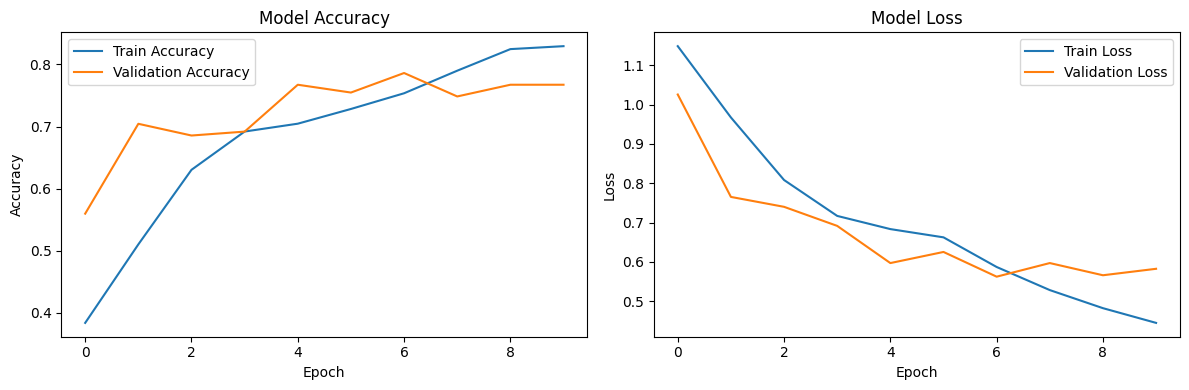

Model saved as 'bean_classification_model.h5'


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load and preprocess images from directories
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = []
    valid_classes = {}  # Track which classes actually have images
    
    # Supported image formats
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif']
   
    # First, get all potential class directories
    all_items = os.listdir(folder_path)
    potential_classes = [item for item in all_items if os.path.isdir(os.path.join(folder_path, item))]
    
    # Process each class
    for class_name in potential_classes:
        class_path = os.path.join(folder_path, class_name)
        class_images = []
        
        for filename in os.listdir(class_path):
            # Check if file has a valid image extension
            ext = os.path.splitext(filename)[1].lower()
            if ext not in valid_extensions:
                print(f"Skipping non-image file: {filename}")
                continue
                
            try:
                img_path = os.path.join(class_path, filename)
                img = load_img(img_path, target_size=image_size)
                img_array = img_to_array(img) / 255.0  # Normalize
                class_images.append(img_array)
            except Exception as e:
                print(f"Error loading image {filename}: {e}")
                continue
        
        # Only add class if it has at least one valid image
        if class_images:
            class_names.append(class_name)
            valid_classes[class_name] = len(class_images)
            images.extend(class_images)
            labels.extend([len(class_names) - 1] * len(class_images))  # Use current index as label
    
    print(f"Found {len(class_names)} valid classes with images:")
    for class_name, count in valid_classes.items():
        print(f"  {class_name}: {count} images")
    
    return np.array(images), np.array(labels), class_names

# Path to your dataset folder (structured as folder/class_name/image.jpg)
dataset_path = r"E:\Xai_Req_Setup\Bean_Dataset"

# Load data
X, y, class_names = load_images_from_folder(dataset_path)
print(f"Loaded {X.shape[0]} images with shape {X.shape[1:]}.")

# Check if we have any images
if X.shape[0] == 0:
    print("No images were loaded. Please check your dataset path and file structure.")
else:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Convert labels to categorical (one-hot encoding)
    num_classes = len(class_names)
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # Define a simple CNN model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    # Display model summary
    model.summary()
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Add early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=3, restore_best_weights=True
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train, 
        epochs=20,  # Increased epochs since we have early stopping
        validation_split=0.2, 
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Predictions and performance metrics
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    y_true = np.argmax(y_test, axis=-1)
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names, labels=range(len(class_names))))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred, labels=range(len(class_names))))

    # Plot training history
    def plot_history(history):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

    plot_history(history)
    
    # Save the model
    model.save('bean_classification_model.h5')
    print("Model saved as 'bean_classification_model.h5'")